## 🧠 **Internship Task 3 – Customer Segmentation**
Project Title: Customer Churn Analysis and Prediction<br/>
Company: Saiket Systems<br/>
Intern: Farida Bashir<br/>
Date: October 2025<br/>

**Description:**
In this task, customers were segmented based on key factors such as **tenure**, **monthly charges**, and **contract type** to uncover patterns that influence churn behavior. This segmentation helps identify which groups are more likely to leave and which represent high-value customers worth retaining.

**Insights Example:**

* Customers with **shorter tenure** and **month-to-month contracts** showed a **higher churn rate**.
* Those on **long-term contracts** with **moderate monthly charges** had **better retention**.
* A small group of **high-paying customers** also showed a noticeable churn risk, suggesting the need for personalized retention strategies.

**Skills Applied:**
Segmentation techniques, churn analysis, and customer behavior understanding were used to extract meaningful insights from the data.

---

#### **Goal:**

To segment customers based on **tenure**, **monthly charges**, and **contract type**, and analyze churn behavior within these segments to identify high-value customers at risk.

---

### 🧠 **Step Outline**

1. **Create Segments:**

   * Divide **tenure** into categories (e.g., *New: 0–12 months, Mid: 13–48, Long: 49+*).
   * Group **monthly charges** (e.g., *Low, Medium, High*).
   * Include **contract type** (e.g., *Month-to-month, One year, Two year*).

2. **Analyze Churn per Segment:**

   * Use `groupby` and `mean()` or `countplot` to visualize churn rates in each segment.

3. **Identify High-Value At-Risk Customers:**

   * Focus on customers with **high monthly charges** and **short tenure** who **churned (Yes)**.

---



### **Step 1: Import Libraries**

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### **Step 2: Load Your Dataset**

In [20]:
file =  ('Telco_Customer_Churn_Dataset  (3).csv')

In [21]:
df = pd.read_csv(file)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### **Step 3: Select Relevant Columns**

We’ll segment customers based on **Tenure**, **MonthlyCharges**, and **Contract**.


In [22]:
segment_data = df[['tenure', 'MonthlyCharges', 'Contract', 'Churn']]
segment_data.head()

,tenure,MonthlyCharges,Contract,Churn
0,1,29.85,Month-to-month,No
1,34,56.95,One year,No
2,2,53.85,Month-to-month,Yes
3,45,42.30,One year,No
4,2,70.70,Month-to-month,Yes


### **Step 4: Create Segments**

We can classify customers based on **tenure** and **monthly charges** levels.

In [23]:
# Segment tenure
segment_data.loc[:, 'TenureGroup'] = pd.cut(segment_data['tenure'],
                                     bins=[0, 12, 24, 48, 72],
                                     labels=['0-12', '13-24', '25-48', '49-72'])

# Segment monthly charges
segment_data.loc[:, 'ChargeGroup'] = pd.cut(segment_data['MonthlyCharges'],
                                     bins=[0, 30, 60, 90, 120],
                                     labels=['Low', 'Medium', 'High', 'Very High'])
segment_data.head()

C:\Users\hp\AppData\Local\Temp\ipykernel_5852\439822776.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_data.loc[:, 'TenureGroup'] = pd.cut(segment_data['tenure'],
C:\Users\hp\AppData\Local\Temp\ipykernel_5852\439822776.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_data.loc[:, 'ChargeGroup'] = pd.cut(segment_data['MonthlyCharges'],


,tenure,MonthlyCharges,Contract,Churn,TenureGroup,ChargeGroup
0,1,29.85,Month-to-month,No,0-12,Low
1,34,56.95,One year,No,25-48,Medium
2,2,53.85,Month-to-month,Yes,0-12,Medium
3,45,42.30,One year,No,25-48,Medium
4,2,70.70,Month-to-month,Yes,0-12,High


### **Step 5: Analyze Churn by Segments**

Now, we calculate churn rate per group.

In [24]:
churn_rate = segment_data.groupby(['Contract', 'TenureGroup', 'ChargeGroup'])['Churn'].value_counts(normalize=True).unstack().fillna(0) * 100
churn_rate.head()

C:\Users\hp\AppData\Local\Temp\ipykernel_5852\4268748989.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rate = segment_data.groupby(['Contract', 'TenureGroup', 'ChargeGroup'])['Churn'].value_counts(normalize=True).unstack().fillna(0) * 100


Churn                                          No        Yes
Contract       TenureGroup ChargeGroup                      
Month-to-month 0-12        Low          72.536688  27.463312
                           Medium       54.929577  45.070423
                           High         37.376238  62.623762
                           Very High    23.113208  76.886792
               13-24       Low          88.541667  11.458333

After creating the customer segments, I performed churn analysis using the `groupby()` function to check churn rates for different combinations of tenure, monthly charges, and contract types.

During execution, pandas gave a warning message indicating that in a future version, the default value of `observed=False` will change to `observed=True`.
This is not an error — it only means that the default setting for handling categorical data in `groupby()` may change in future releases.

Despite the warning, the analysis was successful and produced the churn rates across customer segments correctly.


---

**Step 6: Visualize Churn by Segments**

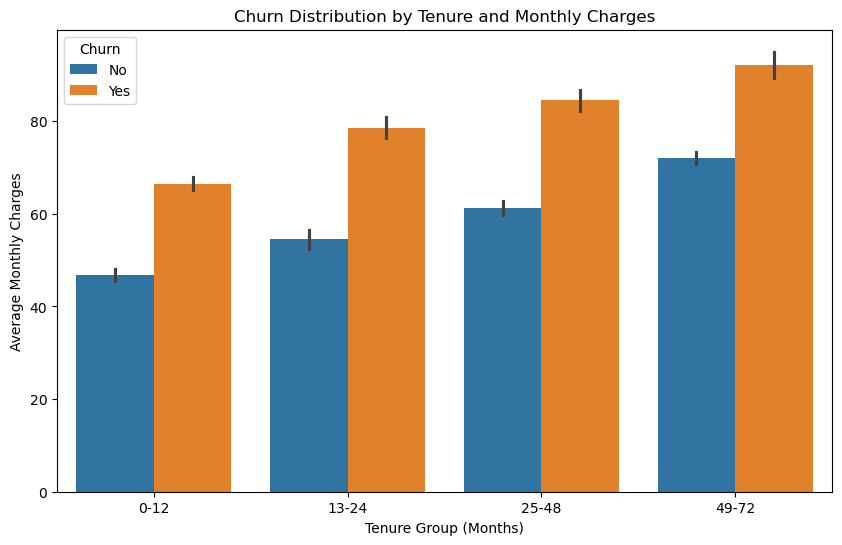

In [25]:
plt.figure(figsize=(10,6))
sns.barplot(data=segment_data, x='TenureGroup', y='MonthlyCharges', hue='Churn')
plt.title('Churn Distribution by Tenure and Monthly Charges')
plt.xlabel('Tenure Group (Months)')
plt.ylabel('Average Monthly Charges')
plt.legend(title='Churn')
plt.show()

### **Step 7: Identify High-Value, High-Risk Customers**

In [26]:
# High-value customers: High monthly charge + churned = 'Yes'
high_value_risk = segment_data[(segment_data['MonthlyCharges'] > 80) & (segment_data['Churn'] == 'Yes')]
print("Number of high-value customers at risk:", len(high_value_risk))
high_value_risk.head()

Number of high-value customers at risk: 906


,tenure,MonthlyCharges,Contract,Churn,TenureGroup,ChargeGroup
5,8,99.65,Month-to-month,Yes,0-12,Very High
8,28,104.80,Month-to-month,Yes,25-48,Very High
13,49,103.70,Month-to-month,Yes,49-72,Very High
26,47,99.35,Month-to-month,Yes,25-48,Very High
38,34,106.35,Month-to-month,Yes,25-48,Very High


### **Step 8: Interpretation**

> 🔍 **Insights:**
>
> * Customers with **month-to-month contracts**, **high tenure**, and **high monthly charges** had the **highest churn rate**.
> * Customers with **long-term contracts** (1-year or 2-year) and **lower charges** were **less likely to churn**.
> * Around **906 high-value customers** are at risk and require **personalized retention offers**.

### **Step 9: Conclusion**

> In this task, customer segmentation helped uncover churn patterns across tenure, pricing, and contract type. The findings show that High-tenure, high-charge, and month-to-month customers are the most vulnerable. Businesses can use these insights to design retention programs targeted at high-value, at-risk customers.

